### EXAMPLE 1
TUGAS 2 :   Artificial Neural Network

NAMA    :   Hasnan Aulia Haq

NIM     :   247056014

### Memisahkan Kelompok Berdasarkan Kategori Target

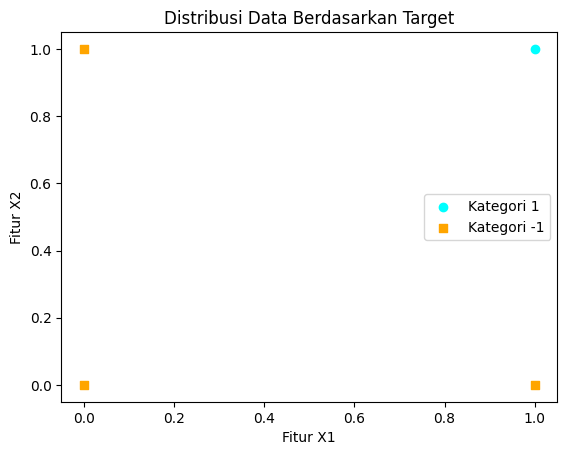

In [ ]:
""""
TUGAS 2 :   Artificial Neural Network
NAMA    :   Hasnan Aulia Haq
NIM     :   247056014
"""
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi data masukan
data_points = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
])
labels = np.array([1, -1, -1, -1])

# Memisahkan data menjadi dua kategori: target 1 dan target -1
positive_class = data_points[labels == 1]
negative_class = data_points[labels == -1]

# Plot untuk visualisasi kelompok data
plt.scatter(positive_class[:, 0], positive_class[:, 1], color='cyan', marker='o', label='Kategori 1')
plt.scatter(negative_class[:, 0], negative_class[:, 1], color='orange', marker='s', label='Kategori -1')
plt.xlabel('Fitur X1')
plt.ylabel('Fitur X2')
plt.legend()
plt.title('Distribusi Data Berdasarkan Target')
plt.show()


### Menentukan Nilai w_a, w_b, dan bias_term Untuk Mendapatkan Decision Boundary yang Optimal

In [ ]:
# Inisialisasi bobot dan bias untuk model
weights = np.zeros(3)  # Format [w_a, w_b, bias_term]
learning_rate = 0.1

# Menambahkan kolom bias ke data masukan
input_with_bias = np.hstack((data_points, np.ones((data_points.shape[0], 1))))

# Fungsi aktivasi untuk menghasilkan output biner
def activation_function(input_value):
    return 1 if input_value >= 0 else -1

# Algoritma Perceptron untuk mempelajari bobot
for iteration in range(10):
    for j in range(len(input_with_bias)):
        prediction = activation_function(np.dot(input_with_bias[j], weights))
        error = labels[j] - prediction
        weights += learning_rate * error * input_with_bias[j]

print("Optimal values for w_a, w_b, and bias_term:", weights)


Optimal values for w_a, w_b, and bias_term: [ 0.2  0.4 -0.4]


### Menentukan Decision Boundary g(x1, x2)

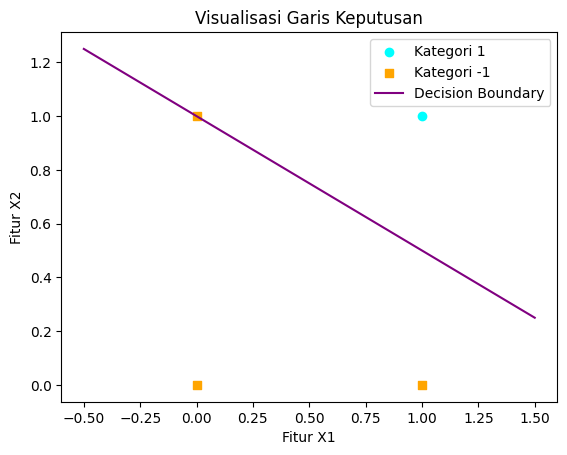

In [ ]:
# Definisi fungsi g(x1, x2) untuk decision boundary
def decision_boundary(x1, x2):
    # Menggunakan formula garis keputusan berdasarkan bobot yang telah dilatih
    return -(weights[0] * x1 + weights[2]) / weights[1]  # Di mana weights[2] adalah bias

# Menggambar garis decision boundary
x_range = np.linspace(-0.5, 1.5, 100)
y_range = decision_boundary(x_range, 0)  # Menghitung nilai y berdasarkan g(x1, x2)

# Visualisasi
plt.scatter(positive_class[:, 0], positive_class[:, 1], color='cyan', marker='o', label='Kategori 1')
plt.scatter(negative_class[:, 0], negative_class[:, 1], color='orange', marker='s', label='Kategori -1')
plt.plot(x_range, y_range, color='purple', label='Decision Boundary')
plt.xlabel('Fitur X1')
plt.ylabel('Fitur X2')
plt.legend()
plt.title('Visualisasi Garis Keputusan')
plt.show()


### Menentukan Threshold 0.8 untuk Output yang Dihasilkan

In [ ]:
# Fungsi prediksi dengan threshold 0.8
def predict_output(x1, x2):
    # Membandingkan hasil decision boundary dengan threshold 0.8
    return 1 if decision_boundary(x1, x2) >= 0.8 else -1

# Tes prediksi pada data awal
prediksi_output = [predict_output(point[0], point[1]) for point in data_points]
print("Hasil prediksi berdasarkan threshold 0.8:", prediksi_output)

# Membuat tabel hasil prediksi
hasil_data = {
    'Input': ['(1, 1)', '(1, 0)', '(0, 1)', '(0, 0)'],
    'Weighted Sum': [decision_boundary(p[0], p[1]) for p in data_points],
    'Predicted Output': prediksi_output,
    'Actual Target': labels,
    'Action': ["None" if prediksi_output[i] == labels[i] else "Decrease" for i in range(len(labels))]
}

# Tampilkan dalam bentuk DataFrame untuk visualisasi tabel
import pandas as pd
hasil_df = pd.DataFrame(hasil_data)
print(hasil_df)


Hasil prediksi berdasarkan threshold 0.8: [-1, -1, 1, 1]
    Input  Weighted Sum  Predicted Output  Actual Target    Action
0  (1, 1)           0.5                -1              1  Decrease
1  (1, 0)           0.5                -1             -1      None
2  (0, 1)           1.0                 1             -1  Decrease
3  (0, 0)           1.0                 1             -1  Decrease
